# YASH POKERNA
# 20BBS0212

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [8]:
data.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

# Perform Visualizations

## Univariate Analysis


<AxesSubplot:xlabel='sex', ylabel='Count'>

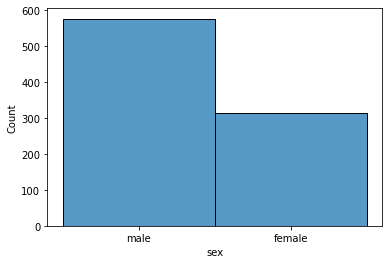

In [11]:
sns.histplot(data.sex)

Text(0, 0.5, 'Count')

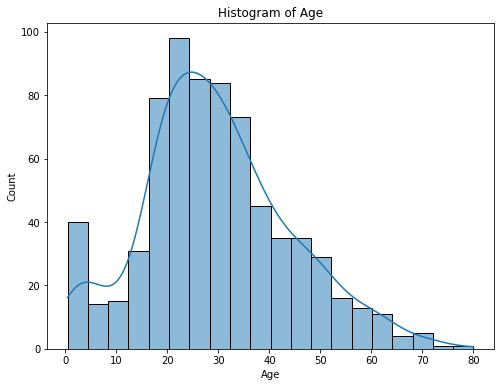

In [12]:
plt.figure(figsize=(8,6))

sns.histplot(data["age"].dropna(),bins=20,kde= True)

plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")

C:\Users\Devyansh Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

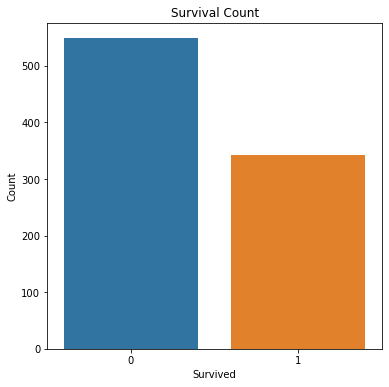

In [14]:
plt.figure(figsize=(6, 6))


sns.countplot(data['survived'])

plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")

# Bivariate Analysis

C:\Users\Devyansh Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


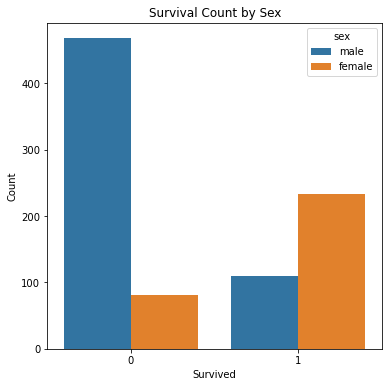

In [17]:
plt.figure(figsize=(6, 6))
sns.countplot(data['survived'], hue=data['sex'])
plt.title("Survival Count by Sex")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# Multivariate Analysis

<AxesSubplot:xlabel='age', ylabel='fare'>

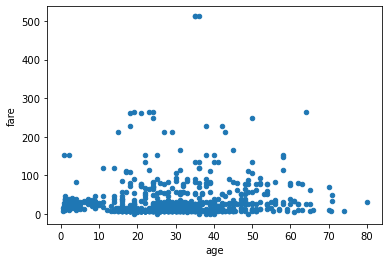

In [20]:
data.plot.scatter('age', 'fare')

# Calculate descriptive statistics

In [24]:
data.describe()

In [28]:
#Median: Calculate the median (50th percentile) of each column
data.median()

survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [29]:
#Mode: Calculate the mode (most frequent value) of each column
data.mode()

survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
0         0       3  male  24.0      0      0  8.05        S  Third  man   

   adult_male deck  embark_town alive  alone  
0        True    C  Southampton    no   True

In [30]:
#Variance: Calculate the variance of each column
data.var()

survived         0.236772
pclass           0.699015
age            211.019125
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

# Handle the Missing values.

In [34]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n",missing_values)

Missing Values:

 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [39]:
median_age = data['age'].median()
data['age'].fillna(median_age, inplace=True)


In [81]:
missing_values = data.isnull().sum()
print("Missing Values after imputation:\n", missing_values)


Missing Values after imputation:

 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [41]:
data['embark_town'].fillna(round,inplace=True)


In [42]:
data['embarked'].fillna('c',inplace=True)


In [43]:
# Verify if missing values have been handled
missing_values = data.isnull().sum()
print("Missing Values after imputation:\n", missing_values)


Missing Values after imputation:

 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


# Find the outliers and replace the outliers

C:\Users\Devyansh Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

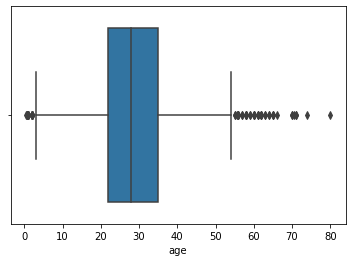

In [45]:
sns.boxplot(data['age'])

In [46]:
# Calculate the quartiles and IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1


In [47]:
IQR

13.0

In [48]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [49]:
# Find outliers in the 'Age' column
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]


In [50]:
# Replace outliers with the median age
median_age = data['age'].median()
data.loc[(data['age'] < lower_bound) | (data['age'] > upper_bound), 'age'] = median_age


In [51]:
# Verify if outliers have been replaced
outliers_replaced = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
print("Outliers replaced:", outliers_replaced)


Outliers replaced: Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, embark_town, alive, alone]
Index: []


C:\Users\Devyansh Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

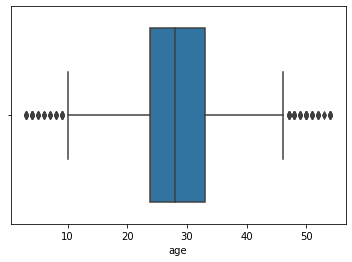

In [52]:
sns.boxplot(data.age)

C:\Users\Devyansh Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

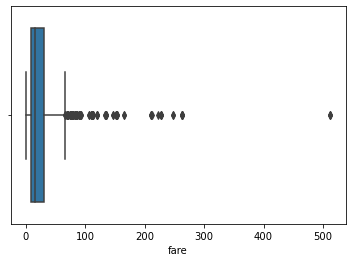

In [53]:
sns.boxplot(data.fare)

# Check for Categorical columns and perform encoding.

In [95]:
data_types = data.dtypes
categorical_columns = data_types[data_types == 'object'].index.tolist()


In [96]:
data = pd.get_dummies(data, columns=categorical_columns)


In [97]:
print(data.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0      1      0   7.2500         2      2    1   
1         1       1    0  38.0      1      0  65.6344         0      0    2   
2         1       3    0  26.0      0      0   7.9250         2      2    2   
3         1       1    0  35.0      1      0  53.1000         2      0    2   
4         0       3    1  35.0      0      0   8.0500         2      2    1   

   adult_male  alive  alone  embark_town_<built-in function round>  \
0           1      0      0                                      0   
1           0      1      0                                      0   
2           0      1      1                                      0   
3           0      1      0                                      0   
4           1      0      1                                      0   

   embark_town_Cherbourg  embark_town_Queenstown  embark_town_Southampton  
0                      0    

# Split the data into dependent and independent variables

In [99]:
X = data.drop("survived", axis=1) 
y = data["survived"]  


In [100]:
print("Independent Variables (Features):\n", X.head())

Independent Variables (Features):
    pclass  sex   age  sibsp  parch     fare  embarked  class  who  adult_male  \
0       3    1  22.0      1      0   7.2500         2      2    1           1   
1       1    0  38.0      1      0  65.6344         0      0    2           0   
2       3    0  26.0      0      0   7.9250         2      2    2           0   
3       1    0  35.0      1      0  53.1000         2      0    2           0   
4       3    1  35.0      0      0   8.0500         2      2    1           1   

   alive  alone  embark_town_<built-in function round>  embark_town_Cherbourg  \
0      0      0                                      0                      0   
1      1      0                                      0                      1   
2      1      1                                      0                      0   
3      1      0                                      0                      0   
4      0      1                                      0                   

In [101]:
print("\nDependent Variable (Target):\n", y.head())


Dependent Variable (Target):
 0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [102]:
data.head()

survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0      1      0   7.2500         2      2    1   
1         1       1    0  38.0      1      0  65.6344         0      0    2   
2         1       3    0  26.0      0      0   7.9250         2      2    2   
3         1       1    0  35.0      1      0  53.1000         2      0    2   
4         0       3    1  35.0      0      0   8.0500         2      2    1   

   adult_male  alive  alone  embark_town_<built-in function round>  \
0           1      0      0                                      0   
1           0      1      0                                      0   
2           0      1      1                                      0   
3           0      1      0                                      0   
4           1      0      1                                      0   

   embark_town_Cherbourg  embark_town_Queenstown  embark_town_Southampton  
0                      0                       0                        1  
1                      1                       0                        0  
2                      0                       0                        1  
3                      0                       0                        1  
4                      0                       0                        1

# Scale the independent variables

In [103]:
from sklearn.preprocessing import LabelEncoder


In [104]:
le=LabelEncoder()

In [105]:
data.who=le.fit_transform(data.who)

In [106]:
data.who.value_counts()

1    537
2    271
0     83
Name: who, dtype: int64

In [116]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X=scale.fit_transform(X)
X

array([[1.        , 1.        , 0.37254902, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.68627451, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.45098039, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.49019608, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.45098039, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.56862745, ..., 0.        , 1.        ,
        0.        ]])

# Split the data into training and testing

In [117]:
from sklearn.model_selection import train_test_split


In [118]:
X = data.drop("survived", axis=1) 
y = data["survived"]  

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [120]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (712, 16) (712,)
Testing set shape: (179, 16) (179,)


In [121]:
X_train.head()

pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
331       1    1  45.5      0      0  28.5000         2      0    1   
733       2    1  23.0      0      0  13.0000         2      1    1   
382       3    1  32.0      0      0   7.9250         2      2    1   
704       3    1  26.0      1      0   7.8542         2      2    1   
813       3    0   6.0      4      2  31.2750         2      2    0   

     adult_male  alive  alone  embark_town_<built-in function round>  \
331           1      0      1                                      0   
733           1      0      1                                      0   
382           1      0      1                                      0   
704           1      0      0                                      0   
813           0      0      0                                      0   

     embark_town_Cherbourg  embark_town_Queenstown  embark_town_Southampton  
331                      0                       0                        1  
733                      0                       0                        1  
382                      0                       0                        1  
704                      0                       0                        1  
813                      0                       0                        1

In [122]:
X_test.head()

pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
709       3    1  28.0      1      1  15.2458         0      2    1   
439       2    1  31.0      0      0  10.5000         2      1    1   
840       3    1  20.0      0      0   7.9250         2      2    1   
720       2    0   6.0      0      1  33.0000         2      1    0   
39        3    0  14.0      1      0  11.2417         0      2    0   

     adult_male  alive  alone  embark_town_<built-in function round>  \
709           1      1      0                                      0   
439           1      0      1                                      0   
840           1      0      1                                      0   
720           0      1      0                                      0   
39            0      1      0                                      0   

     embark_town_Cherbourg  embark_town_Queenstown  embark_town_Southampton  
709                      1                       0                        0  
439                      0                       0                        1  
840                      0                       0                        1  
720                      0                       0                        1  
39                       1                       0                        0

In [123]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64

In [124]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 712, dtype: int64